<a href="https://colab.research.google.com/github/etherzhhb/PollyTryBot/blob/master/nn_isl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install islpy

    100% |████████████████████████████████| 1.2MB 17.1MB/s 
  Running setup.py bdist_wheel for islpy ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/c0/6e/ed/eee64c8588c6a281e1ed02486572fdddc06478f0e276a2d128
Successfully built islpy


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tensorflow as tf
import numpy as np
import math

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(mnist.train.num_examples)
print(mnist.test.num_examples)

# The number of pixels in each dimension of an image.# The n 
img_size = 28

# The images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = (img_size, img_size, num_channels)

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9

    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i].argmax())
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i].argmax(), cls_pred[i].argmax())

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred.argmax(axis=1) != mnist.test.labels.argmax(axis=1))

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = mnist.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = mnist.test.labels[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [0]:
def plot_conv_weights(weights, input_channel=0):
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(weights)
    w_max = np.max(weights)

    # Number of filters used in the conv. layer.
    num_filters = weights.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = weights[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [0]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

def plot_conv_output(values):
    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [0]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

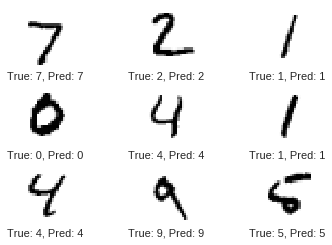

In [8]:
plot_images(images=mnist.test.images[0:9], cls_true=mnist.test.labels[0:9], cls_pred=mnist.test.labels[0:9])

In [9]:
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import *
from keras import regularizers

Using TensorFlow backend.


In [10]:
try:
    del model
except:
    pass

# Start construction of the Keras Sequential model.


# Add an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
inputs = Input(shape=img_shape_full)
net = inputs

#model.add(GaussianNoise(stddev=0.2))

# The input is a flattened array with 784 elements,
# but the convolutional layers expect images with shape (28, 28, 1)
# model.add(Reshape(img_shape_full))

reg_strength = 0.01

# Convolutional layer with ReLU-activation and max-pooling.
for num_filters in [32, 64] :
    net = Conv2D(kernel_size=3, strides=1, filters=num_filters, padding='same')(net)
    net = BatchNormalization(axis=-1)(net)
    net = Activation('relu')(net)
    layer_in = net
    net = Conv2D(kernel_size=3, strides=1, filters=num_filters, padding='same')(net)
    net = BatchNormalization(axis=-1)(net)
    net = Activation('relu')(net)
    net = Conv2D(kernel_size=3, strides=1, filters=num_filters, padding='same')(net)
    net = BatchNormalization(axis=-1)(net)
    net = Activation('relu')(net)
    net = add([layer_in, net])
    #model.add(Dropout(0.5))
    net = MaxPooling2D(pool_size=2, strides=2)(net)


# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
net = Flatten()(net)

# First fully-connected / dense layer with ReLU-activation.
net = Dense(512)(net)
net = BatchNormalization(axis=-1)(net)
net = Activation('relu')(net)
# Last fully-connected / dense layer with softmax-activation
# for use in classification.
net = Dense(num_classes, activation='softmax')(net)

outputs = net

model = Model(inputs=inputs, outputs=outputs)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 32)   0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [0]:
from tensorflow.python.keras.optimizers import Adam

optimizer = Adam()

In [0]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()
batch_size=256
shape = (-1, img_size, img_size, num_channels)
train_generator  = gen.flow(mnist.train.images.reshape(shape), mnist.train.labels, batch_size=batch_size)
validation_generator = test_gen.flow(mnist.validation.images.reshape(shape), mnist.validation.labels, batch_size=batch_size)

In [15]:
%%time
#model.fit(x=mnist.train.images, y=mnist.train.labels, epochs=100, batch_size=1024,
#          validation_data=(mnist.validation.images, mnist.validation.labels),
#          verbose=1)
history = model.fit_generator(train_generator, epochs=10, steps_per_epoch=mnist.train.num_examples//batch_size,
                              validation_data=validation_generator, validation_steps=mnist.test.num_examples//batch_size,
                              verbose=1)

Epoch 1/10
214/214 [==============================] - 28s 131ms/step - loss: 0.1289 - acc: 0.9595 - val_loss: 3.0924 - val_acc: 0.1556
Epoch 2/10
214/214 [==============================] - 24s 111ms/step - loss: 0.0420 - acc: 0.9870 - val_loss: 0.7212 - val_acc: 0.7230
Epoch 3/10
214/214 [==============================] - 23s 109ms/step - loss: 0.0317 - acc: 0.9902 - val_loss: 0.0883 - val_acc: 0.9722
Epoch 4/10
214/214 [==============================] - 23s 109ms/step - loss: 0.0281 - acc: 0.9912 - val_loss: 0.0497 - val_acc: 0.9849
Epoch 5/10
214/214 [==============================] - 23s 109ms/step - loss: 0.0230 - acc: 0.9930 - val_loss: 0.0422 - val_acc: 0.9882
Epoch 6/10
214/214 [==============================] - 23s 110ms/step - loss: 0.0216 - acc: 0.9935 - val_loss: 0.0433 - val_acc: 0.9862
Epoch 7/10
214/214 [==============================] - 23s 109ms/step - loss: 0.0202 - acc: 0.9934 - val_loss: 0.0653 - val_acc: 0.9807
Epoch 8/10
214/214 [==============================] - 2

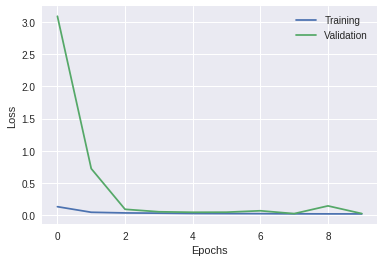

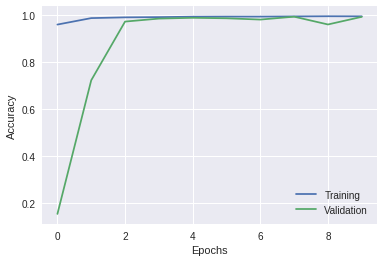

In [16]:
plot_history(history)

In [17]:
result = model.evaluate(x=mnist.test.images.reshape(shape),
                        y=mnist.test.labels)
for name, value in zip(model.metrics_names, result) :
    print(name, value)

10000/10000 [==============================] - 2s 153us/step
loss 0.02147128265624051
acc 0.9932


In [0]:
y_pred = model.predict(mnist.test.images.reshape(shape))

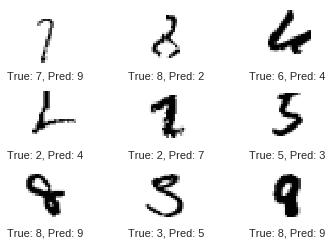

In [19]:
plot_example_errors(y_pred)

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [21]:
!ls

MNIST_data  model.json	sample_data


In [0]:
import json

In [0]:
with open("model.json", "r") as json_file:
  m = json.load(json_file)

In [24]:
print(json.dumps(m, sort_keys=True, indent=2, separators=(',', ': ')))

{
  "backend": "tensorflow",
  "class_name": "Model",
  "config": {
    "input_layers": [
      [
        "input_1",
        0,
        0
      ]
    ],
    "layers": [
      {
        "class_name": "InputLayer",
        "config": {
          "batch_input_shape": [
            null,
            28,
            28,
            1
          ],
          "dtype": "float32",
          "name": "input_1",
          "sparse": false
        },
        "inbound_nodes": [],
        "name": "input_1"
      },
      {
        "class_name": "Conv2D",
        "config": {
          "activation": "linear",
          "activity_regularizer": null,
          "bias_constraint": null,
          "bias_initializer": {
            "class_name": "Zeros",
            "config": {
              "dtype": "float32"
            }
          },
          "bias_regularizer": null,
          "data_format": "channels_last",
          "dilation_rate": [
            1,
            1
          ],
          "dtype": "float32"

In [25]:
for l in m["config"]["layers"] :
  print(l)

{'name': 'input_1', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 28, 28, 1], 'dtype': 'float32', 'sparse': False, 'name': 'input_1'}, 'inbound_nodes': []}
{'name': 'conv2d', 'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'inbound_nodes': [[['input_1', 0, 0, {}]]]}
{'name': 'batch_normalization', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99

In [0]:
import islpy as isl
import copy

def PrintCode(Schedule) :
  context = isl.Set("{ : }")
  build = isl.AstBuild.from_context(context)
  if isinstance(Schedule, isl.Schedule):
    ast = build.node_from_schedule(Schedule)
  else:
    ast = build.node_from_schedule_map(Schedule)

  opts = isl.AstPrintOptions.alloc(isl.DEFAULT_CONTEXT)
  #opts, cb_print_user_handle = opts.set_print_user(cb_print_user)
  #opts, cb_print_for_handle = opts.set_print_for(cb_print_for)

  printer = isl.Printer.to_str(isl.DEFAULT_CONTEXT)
  printer = printer.set_output_format(isl.format.C)
  #printer.print_str("// Start\n")
  printer = ast.print_(printer, opts)
  print(printer.get_str())

In [66]:
batchsize = 128
#build a statement for each layers

OutputShapes = {}

TotalSchedule = None

def appendSchedule(Schedule):
  global TotalSchedule
  if not TotalSchedule:
    TotalSchedule = Schedule
  else:
    TotalSchedule = TotalSchedule.sequence(Schedule)

def getInputName(l) :
  return l["inbound_nodes"][0][0][0]

def getOutputShape(name) :
  return OutputShapes.get(name, [batchsize, 0]).copy()

def buildStmtForDense(l) :
  name = l["name"]
  units = l["config"]["units"]
  #Generate statement with 3d loops
  InputName = getInputName(l)
  InputShape = getOutputShape(InputName)
  OutputShape = InputShape.copy()
  OutputShape[-1] = units
  OutputShapes[name] = OutputShape


  #i,j,k -> N,M,L
  N = OutputShape[0]
  M = OutputShape[1]
  L = InputShape[-1]

  WeightShape = [L, M]

  MulStmt = isl.Set("{{Mult_{Name}[i, j, k] : 0 <= i < {N} and 0 <= j < {M} and 0 <= k < {L}}}".format(N=N,M=M,L=L,Name=name))
  RedStmt = isl.Set("{{Red_{Name}[i, j] : 0 <= i < {N} and 0 <= j < {M}}}".format(N=N,M=M,Name=name))

  MulSchedule = isl.Schedule.from_domain(MulStmt)
  MulSchedule = MulSchedule.insert_partial_schedule(isl.MultiUnionPwAff("[{{Mult_{Name}[i, j, k] -> [(k)] }}]".format(Name=name)))
  RedSchedule = isl.Schedule.from_domain(RedStmt)
  Schedule = MulSchedule.sequence(RedSchedule)
  Schedule = Schedule.insert_partial_schedule(isl.MultiUnionPwAff("[{{Red_{Name}[i, j] -> [(j)]; Mult_{Name}[i, j, k] -> [(j)]}}]".format(Name=name)))
  Schedule = Schedule.insert_partial_schedule(isl.MultiUnionPwAff("[{{Red_{Name}[i, j] -> [(i)]; Mult_{Name}[i, j, k] -> [(i)]}}]".format(Name=name)))
  appendSchedule(Schedule)
  
def buildStmtForInput(l) :
  name = l["name"]
  shape = l["config"]["batch_input_shape"]
  shape[0] = batchsize
  OutputShapes[name] = shape

def buildStmtForConv2D(l) :
  name = l["name"]
  filters = l["config"]["filters"]
  kernel_size = l["config"]["kernel_size"]
  strides = l["config"]["strides"]
  InputName = getInputName(l)
  InputShape = getOutputShape(InputName)
  OutputShape = InputShape.copy()
  OutputShape[-1] = filters
  OutputShapes[name] = OutputShape
  #print(InputShape, "->", OutputShape)
  
  C = filters
  W = InputShape[-3]
  H = InputShape[-2]
  KW = kernel_size[0]
  KH = kernel_size[1]
  #https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
  #foreach input in batch - b
  #  foreach channel in input - c
  #    for W in channel - i
  #      for H in channel - j
  #        for KW in kernel -ki
  #          for KH in kernel -kj
  #            ElementwiseMult
  #  Reduce on channel   
  MulStmt = isl.Set("{{Mult_{Name}[b, c, i, j, ki, kj] : 0 <= b < {BatchSize} and 0 <= c < {C} and 0 <= i < {W} and 0 <= j < {H} and 0 <= ki < {KW} and 0 <= kj < {KH}}}".format(BatchSize=batchsize,C=C,W=W,H=H,KW=KW,KH=KH,Name=name))
  RedStmt = isl.Set("{{Red_{Name}[b] : 0 <= b < {BatchSize} }}".format(BatchSize=batchsize,Name=name))

  MulSchedule = isl.Schedule.from_domain(MulStmt)
  MulSchedule = MulSchedule.insert_partial_schedule(isl.MultiUnionPwAff("[{{Mult_{Name}[b, c, i, j, ki, kj] -> [(kj)] }}]".format(Name=name)))
  MulSchedule = MulSchedule.insert_partial_schedule(isl.MultiUnionPwAff("[{{Mult_{Name}[b, c, i, j, ki, kj] -> [(ki)] }}]".format(Name=name)))
  MulSchedule = MulSchedule.insert_partial_schedule(isl.MultiUnionPwAff("[{{Mult_{Name}[b, c, i, j, ki, kj] -> [(j)] }}]".format(Name=name)))
  MulSchedule = MulSchedule.insert_partial_schedule(isl.MultiUnionPwAff("[{{Mult_{Name}[b, c, i, j, ki, kj] -> [(i)] }}]".format(Name=name)))
  MulSchedule = MulSchedule.insert_partial_schedule(isl.MultiUnionPwAff("[{{Mult_{Name}[b, c, i, j, ki, kj] -> [(c)] }}]".format(Name=name)))

  RedSchedule = isl.Schedule.from_domain(RedStmt)

  Schedule = MulSchedule.sequence(RedSchedule)
  Schedule = Schedule.insert_partial_schedule(isl.MultiUnionPwAff("[{{Red_{Name}[b] -> [(b)]; Mult_{Name}[b, c, i, j, ki, kj] -> [(b)]}}]".format(Name=name)))
  appendSchedule(Schedule)

  
def buildStmtForBatchNormalization(l) :
  name = l["name"]
  InputName = getInputName(l)
  InputShape = getOutputShape(InputName)
  OutputShapes[name] = InputShape

def buildStmtForActivation(l) :
  name = l["name"]
  InputName = getInputName(l)
  InputShape = getOutputShape(InputName)
  OutputShapes[name] = InputShape
  space = isl.Space.set_alloc(isl.DEFAULT_CONTEXT, 0, len(InputShape)).set_tuple_name(isl.dim_type.set, "Active_{Name}".format(Name=name))
  LS = isl.LocalSpace.from_space(space)
  Stmt = isl.Set.universe(space)
  for idx, val in enumerate(InputShape):
    #LB
    c = isl.Constraint.alloc_inequality(LS)
    c = c.set_coefficient_val(isl.dim_type.set, idx, 1)
    c = c.set_constant_val(0)
    Stmt = Stmt.add_constraint(c)
    
    #UB
    c = isl.Constraint.alloc_inequality(LS)
    c = c.set_coefficient_val(isl.dim_type.set, idx, -1)
    c = c.set_constant_val(val - 1)
    Stmt = Stmt.add_constraint(c)
    
  Schedule = isl.Schedule.from_domain(Stmt)
  #Add loops
  for idx in reversed(range(len(InputShape))):
    print(idx)
    c = isl.Constraint.alloc_equality(LS)
    c = c.set_coefficient_val(isl.dim_type.set, idx, 1)
    Schedule = Schedule.insert_partial_schedule(isl.MultiUnionPwAff.from_multi_aff(isl.MultiAff.from_aff(c.get_aff())))
  appendSchedule(Schedule)
    
def buildStmtForAdd(l) :
  name = l["name"]
  InputName = getInputName(l)
  InputShape = getOutputShape(InputName)
  OutputShapes[name] = InputShape

def buildStmtForFlatten(l) :
  name = l["name"]
  InputName = getInputName(l)
  InputShape = getOutputShape(InputName)
  while (len(InputShape) > 2) :
    last = InputShape.pop(-1)
    InputShape[-1] *= last
  OutputShapes[name] = InputShape

  
def buildStmtForMaxPooling2D(l) :
  name = l["name"]
  pool_size = l["config"]["pool_size"]
  strides = l["config"]["strides"]
  InputName = getInputName(l)
  InputShape = getOutputShape(InputName)
  OutputShape = InputShape.copy()
  OutputShape[-3 + 0] //= strides[0]
  OutputShape[-3 + 1] //= strides[1]
  OutputShapes[name] = OutputShape
  
def buildStmtForAdd(l) :
  name = l["name"]
  InputName = getInputName(l)
  InputShape = getOutputShape(InputName)
  OutputShapes[name] = InputShape
  
for l in m.copy()["config"]["layers"] :
  class_name = l["class_name"]
  if class_name == "Conv2D" :
    buildStmtForConv2D(l)
  elif class_name == "Activation" :
    buildStmtForActivation(l)
  elif class_name == "Dense" :
    buildStmtForDense(l)
  elif class_name == "MaxPooling2D" :
    buildStmtForMaxPooling2D(l)
  elif class_name == "Flatten" :
    buildStmtForFlatten(l)
  elif class_name == "BatchNormalization" :
    buildStmtForBatchNormalization(l)
  elif class_name == "Add" :
    buildStmtForAdd(l)
  elif class_name == "InputLayer" :
    buildStmtForInput(l)
  else :
    print("unhandled layer: %s" % class_name)
    
print("Shapes")
print(OutputShapes)

PrintCode(TotalSchedule)

3
2
1
0
3
2
1
0
3
2
1
0
3
2
1
0
3
2
1
0
3
2
1
0
1
0
Shapes
{'input_1': [128, 28, 28, 1], 'conv2d': [128, 28, 28, 32], 'batch_normalization': [128, 28, 28, 32], 'activation': [128, 28, 28, 32], 'conv2d_1': [128, 28, 28, 32], 'batch_normalization_1': [128, 28, 28, 32], 'activation_1': [128, 28, 28, 32], 'conv2d_2': [128, 28, 28, 32], 'batch_normalization_2': [128, 28, 28, 32], 'activation_2': [128, 28, 28, 32], 'add': [128, 28, 28, 32], 'max_pooling2d': [128, 14, 14, 32], 'conv2d_3': [128, 14, 14, 64], 'batch_normalization_3': [128, 14, 14, 64], 'activation_3': [128, 14, 14, 64], 'conv2d_4': [128, 14, 14, 64], 'batch_normalization_4': [128, 14, 14, 64], 'activation_4': [128, 14, 14, 64], 'conv2d_5': [128, 14, 14, 64], 'batch_normalization_5': [128, 14, 14, 64], 'activation_5': [128, 14, 14, 64], 'add_1': [128, 14, 14, 64], 'max_pooling2d_1': [128, 7, 7, 64], 'flatten': [128, 3136], 'dense': [128, 512], 'batch_normalization_6': [128, 512], 'activation_6': [128, 512], 'dense_1': [128, 10]}